stats

In [146]:
import pandas as pd

In [147]:
df = pd.read_csv('data/gradients.csv')

In [148]:
df

,subject,epoch,region,7net,17net,g1,g2,g3,g4,ecc
0,1,baseline,7Networks_LH_Vis_1,Vis,DorsAttnA,0.516958,-0.186538,1.501042,-0.668984,1.732833
1,1,baseline,7Networks_LH_Vis_2,Vis,VisCent,0.636391,1.407541,0.977047,-0.758676,1.978984
2,1,baseline,7Networks_LH_Vis_3,Vis,DorsAttnA,0.396966,0.630318,1.806822,0.007569,1.954366
3,1,baseline,7Networks_LH_Vis_4,Vis,VisCent,2.380421,2.049884,0.085447,-0.858037,3.257601
4,1,baseline,7Networks_LH_Vis_5,Vis,DefaultC,0.408135,0.698659,0.977117,0.278002,1.298746
...,...,...,...,...,...,...,...,...,...,...
109291,46,late,Right Putamen,Striatum,StriatumRight,-0.861413,-0.664291,-0.450307,-1.694324,2.063208
109292,46,late,Right Pallidum,Striatum,StriatumRight,-0.530126,-0.774942,-0.468807,-1.149747,1.556685
109293,46,late,Right Hippocampus,Striatum,StriatumRight,-0.938860,-0.247830,-1.223909,-1.464685,2.141526
109294,46,late,Right Amygdala,Striatum,StriatumRight,-1.114832,-0.355354,-1.374354,-1.242685,2.191402


# ttests
compare `ecc` values between epochs. False discovery rate (FDR) correction applied.

In [149]:
import pingouin as pg

In [150]:
from matplotlib import pyplot as plt

In [151]:
dfp = df.groupby(['region', '7net', '17net']).apply(pg.pairwise_ttests, dv='ecc', between='epoch',
                                            subject='subject', padjust='fdr_bh')

/Users/qasem/opt/anaconda3/envs/gradient-notebooks/lib/python3.8/site-packages/pingouin/pairwise.py:27: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)
/Users/qasem/opt/anaconda3/envs/gradient-notebooks/lib/python3.8/site-packages/pingouin/pairwise.py:27: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)
/Users/qasem/opt/anaconda3/envs/gradient-notebooks/lib/python3.8/site-packages/pingouin/pairwise.py:27: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)
/Users/qasem/opt/anaconda3/envs/gradient-notebooks/lib/python3.8/site-packages/pingouin/pairwise.py:27: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwi

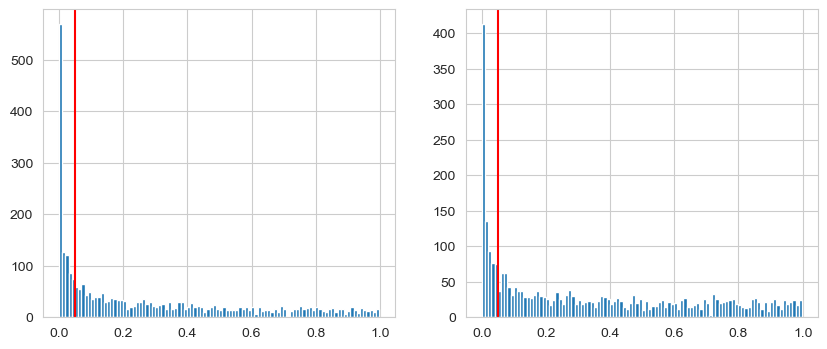

In [152]:
# fdr corrected on right panel
_, ax = plt.subplots(ncols=2, figsize=(10,4))
dfp['p-unc'].hist(bins=100, ax=ax[0]) # uncorrected p value
ax[0].axvline(x=.05, color='red') # type-I error
dfp['p-corr'].hist(bins=100, ax=ax[1]) # corrected p value
ax[1].axvline(x=.05, color='red') # type-I error
plt.show()

In [153]:
region_names = pd.read_csv('data/regions_sorted.csv')['region']

In [154]:
# epoch pairs set to be index
dfp = dfp.reset_index()[['region', '7net', '17net', 'A', 'B', 'T', 'p-unc', 'p-corr']]
dfp = dfp.set_index('region').loc[region_names].reset_index().set_index(['A', 'B'])

In [155]:
# dfp.loc[('baseline', 'early')]

### non-masked

In [156]:
import nibabel
from brainspace.datasets import load_conte69
from brainspace.utils.parcellation import map_to_labels
from surfplot import Plot

In [157]:
fname = '/Users/qasem/PycharmProjects/gradients-rl-task/data/Schaefer2018_1000Parcels_7Networks_order.dlabel.nii'
l_hemi, r_hemi = load_conte69()
vertices = nibabel.load(fname).get_fdata()[0]

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/var/folders/2q/y6tqndfj1yqfc7hcdp99tz_00000gn/T/ipykernel_45330/4213587047.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  data = dfp.loc[('baseline', 'early')].reset_index()['T']


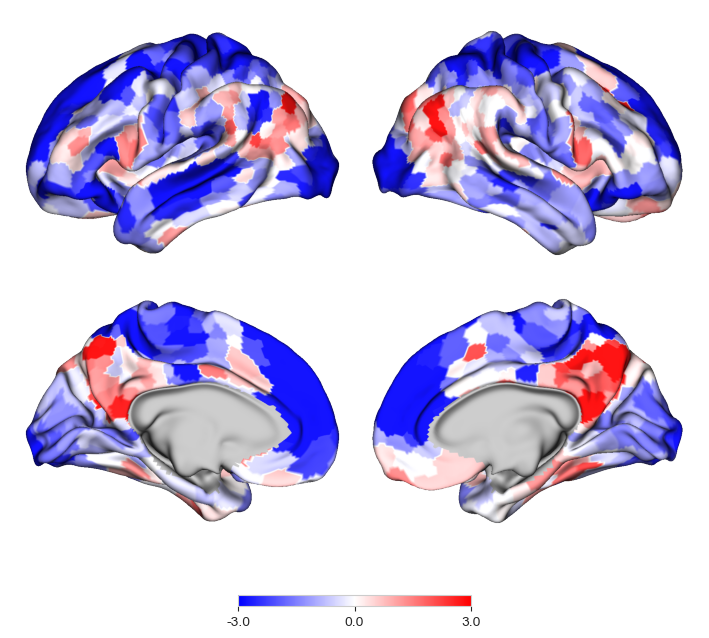

In [158]:
data = dfp.loc[('baseline', 'early')].reset_index()['T']
data = map_to_labels(data, vertices, mask=(vertices != 0))
p = Plot(surf_lh=l_hemi, surf_rh=r_hemi, layout='grid', size=(900, 700))
p.add_layer(data, cbar=True, cmap='bwr', color_range=(-3, 3))
_ = p.build()

/var/folders/2q/y6tqndfj1yqfc7hcdp99tz_00000gn/T/ipykernel_45330/3627473155.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  data = dfp.loc[('early', 'late')].reset_index()['T']


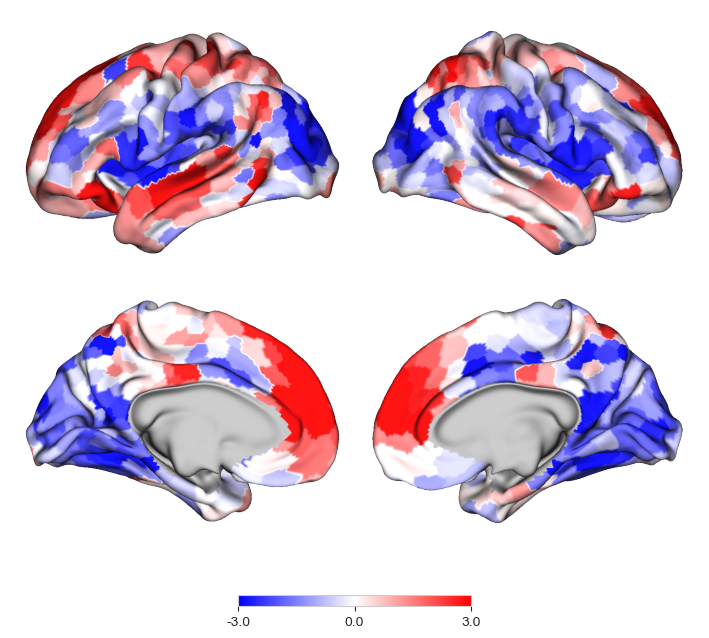

In [159]:
data = dfp.loc[('early', 'late')].reset_index()['T']
data = map_to_labels(data, vertices, mask=(vertices != 0))
p = Plot(surf_lh=l_hemi, surf_rh=r_hemi, layout='grid', size=(900, 700))
p.add_layer(data, cbar=True, cmap='bwr', color_range=(-3, 3))
_ = p.build()

In [160]:
data = dfp.loc[('baseline', 'late')].reset_index()['T']
data

/var/folders/2q/y6tqndfj1yqfc7hcdp99tz_00000gn/T/ipykernel_45330/1105252125.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  data = dfp.loc[('baseline', 'late')].reset_index()['T']


0       1.591990
1      -1.295859
2       0.228973
3      -3.037100
4      -4.128508
          ...   
1007   -1.668875
1008   -0.566890
1009   -2.090885
1010   -1.526642
1011   -0.268323
Name: T, Length: 1012, dtype: float64

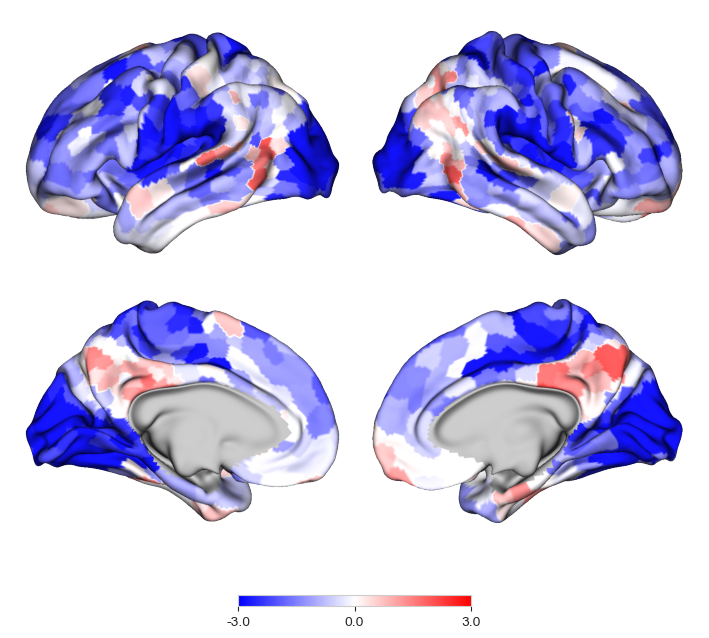

In [161]:
data = map_to_labels(data, vertices, mask=(vertices != 0))
p = Plot(surf_lh=l_hemi, surf_rh=r_hemi, layout='grid', size=(900, 700))
p.add_layer(data, cbar=True, cmap='bwr', color_range=(-3, 3))
_ = p.build()

### masked with FDR pvalue

/var/folders/2q/y6tqndfj1yqfc7hcdp99tz_00000gn/T/ipykernel_45330/3367576336.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  data = dfp.loc[('baseline', 'early')]


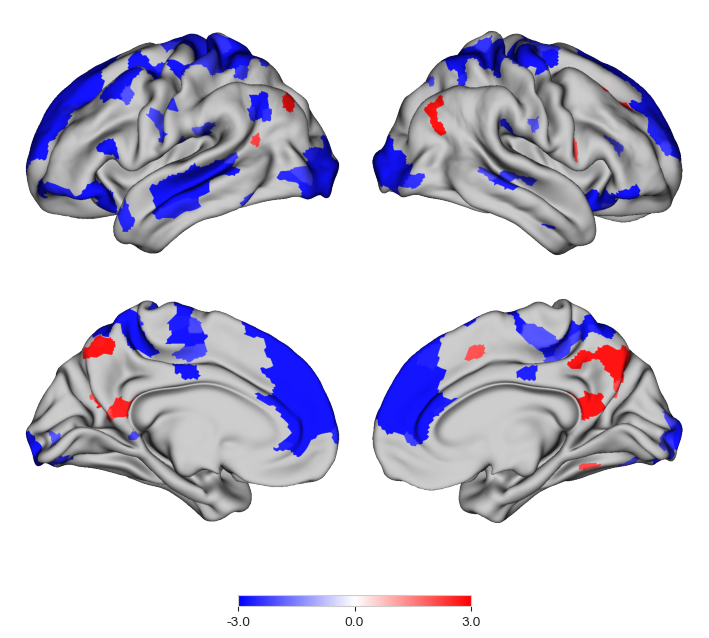

In [162]:
data = dfp.loc[('baseline', 'early')]
data = data.apply(lambda r: r['T'] if r['p-corr'] < 0.05 else None, axis=1).values
data = map_to_labels(data, vertices, mask=(vertices != 0))
p = Plot(surf_lh=l_hemi, surf_rh=r_hemi, layout='grid', size=(900, 700))
p.add_layer(data, cbar=True, cmap='bwr', color_range=(-3, 3))
_ = p.build()

/var/folders/2q/y6tqndfj1yqfc7hcdp99tz_00000gn/T/ipykernel_45330/379872744.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  data = dfp.loc[('early', 'late')]


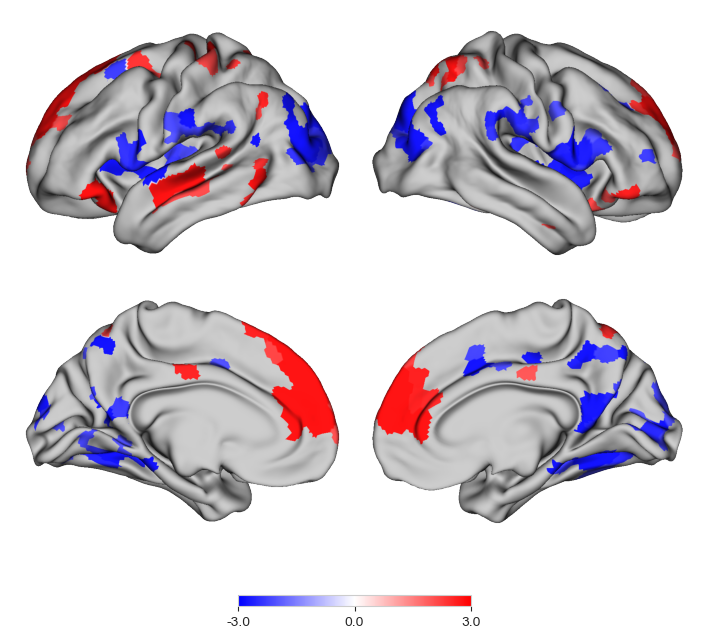

In [163]:
data = dfp.loc[('early', 'late')]
data = data.apply(lambda r: r['T'] if r['p-corr'] < 0.05 else None, axis=1).values
data = map_to_labels(data, vertices, mask=(vertices != 0))
p = Plot(surf_lh=l_hemi, surf_rh=r_hemi, layout='grid', size=(900, 700))
p.add_layer(data, cbar=True, cmap='bwr', color_range=(-3, 3))
_ = p.build()

/var/folders/2q/y6tqndfj1yqfc7hcdp99tz_00000gn/T/ipykernel_45330/3675562018.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  data = dfp.loc[('baseline', 'late')]


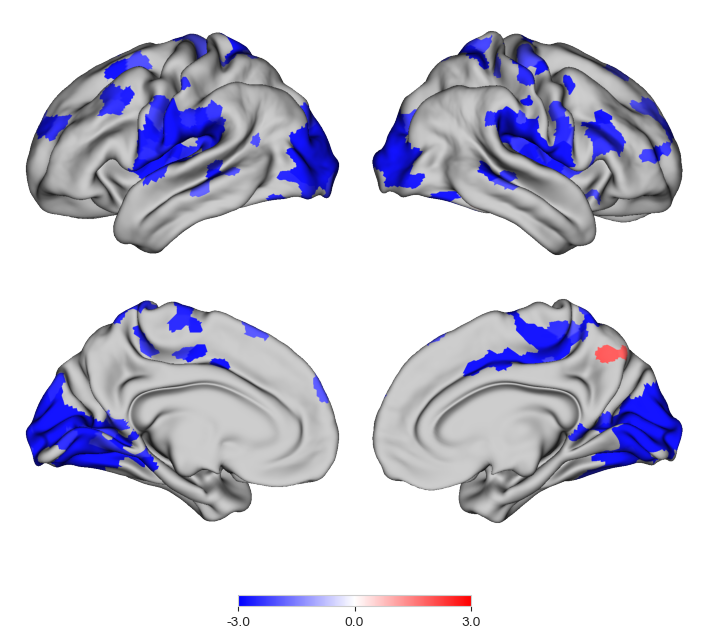

In [164]:
data = dfp.loc[('baseline', 'late')]
data = data.apply(lambda r: r['T'] if r['p-corr'] < 0.05 else None, axis=1).values
data = map_to_labels(data, vertices, mask=(vertices != 0))
p = Plot(surf_lh=l_hemi, surf_rh=r_hemi, layout='grid', size=(900, 700))
p.add_layer(data, cbar=True, cmap='bwr', color_range=(-3, 3))
_ = p.build()

# anova
repeated measures

In [165]:
df

,subject,epoch,region,7net,17net,g1,g2,g3,g4,ecc
0,1,baseline,7Networks_LH_Vis_1,Vis,DorsAttnA,0.516958,-0.186538,1.501042,-0.668984,1.732833
1,1,baseline,7Networks_LH_Vis_2,Vis,VisCent,0.636391,1.407541,0.977047,-0.758676,1.978984
2,1,baseline,7Networks_LH_Vis_3,Vis,DorsAttnA,0.396966,0.630318,1.806822,0.007569,1.954366
3,1,baseline,7Networks_LH_Vis_4,Vis,VisCent,2.380421,2.049884,0.085447,-0.858037,3.257601
4,1,baseline,7Networks_LH_Vis_5,Vis,DefaultC,0.408135,0.698659,0.977117,0.278002,1.298746
...,...,...,...,...,...,...,...,...,...,...
109291,46,late,Right Putamen,Striatum,StriatumRight,-0.861413,-0.664291,-0.450307,-1.694324,2.063208
109292,46,late,Right Pallidum,Striatum,StriatumRight,-0.530126,-0.774942,-0.468807,-1.149747,1.556685
109293,46,late,Right Hippocampus,Striatum,StriatumRight,-0.938860,-0.247830,-1.223909,-1.464685,2.141526
109294,46,late,Right Amygdala,Striatum,StriatumRight,-1.114832,-0.355354,-1.374354,-1.242685,2.191402


In [166]:
dfa = df.groupby(['region', '7net', '17net']).apply(pg.rm_anova, dv='ecc',
                                      within='epoch', subject='subject')

/Users/qasem/opt/anaconda3/envs/gradient-notebooks/lib/python3.8/site-packages/pingouin/parametric.py:551: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  ss_resall = grp_with.apply(lambda x: (x - x.mean()) ** 2).sum()
/Users/qasem/opt/anaconda3/envs/gradient-notebooks/lib/python3.8/site-packages/pingouin/parametric.py:551: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behav

In [167]:
_, dfa['p-corr'] = pg.multicomp(dfa['p-unc'], method='fdr_bh')

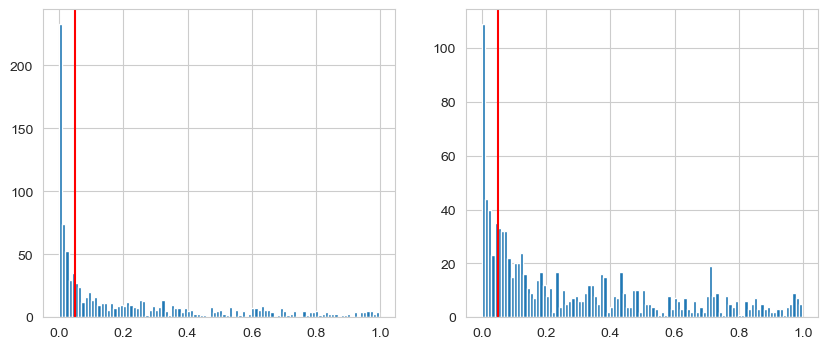

In [168]:
_, ax = plt.subplots(ncols=2, figsize=(10,4))
dfa['p-unc'].hist(bins=100, ax=ax[0]) # uncorrected p value
ax[0].axvline(x=.05, color='red') # type-I error
dfa['p-corr'].hist(bins=100, ax=ax[1]) # corrected p value
ax[1].axvline(x=.05, color='red') # type-I error
plt.show()

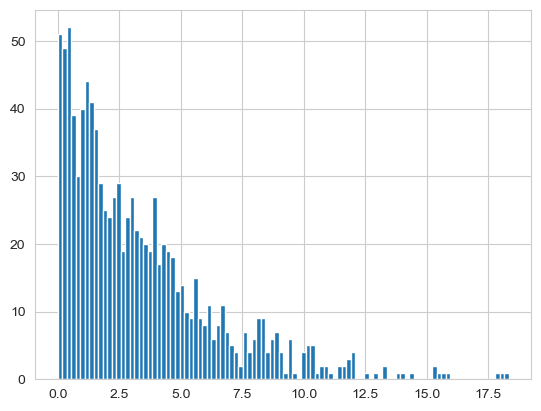

In [169]:
dfa['F'].hist(bins=100)
plt.show()

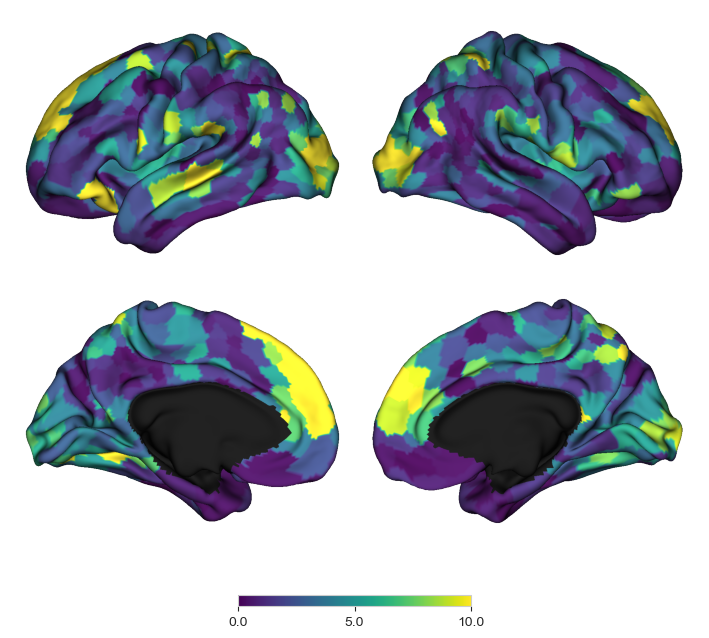

In [170]:
data = dfa.loc[region_names]['F'].values
data = map_to_labels(data, vertices, mask=(vertices != 0))
p = Plot(surf_lh=l_hemi, surf_rh=r_hemi, layout='grid', size=(900, 700))
p.add_layer(data, cbar=True, cmap='viridis', color_range=(0, 10))
_ = p.build()

masked with p value corrected

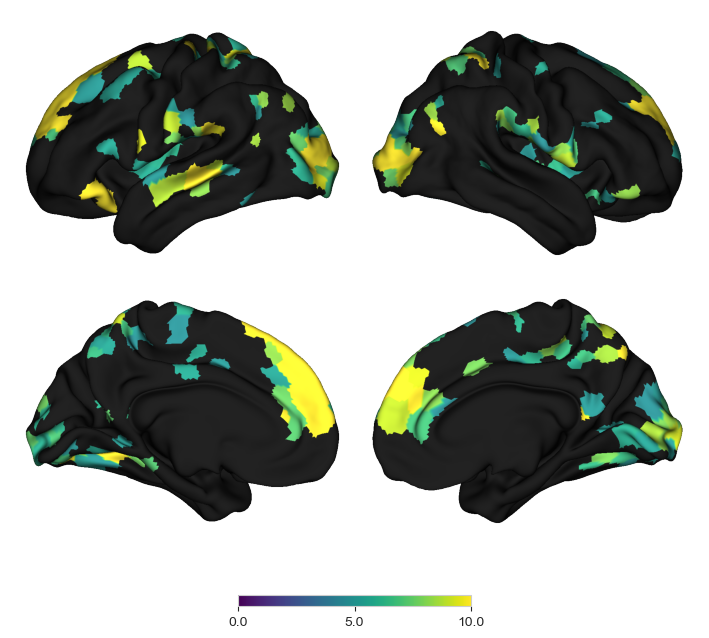

In [171]:
data = dfa.loc[region_names]
data = data.apply(lambda r: r['F'] if r['p-corr'] < 0.05 else None, axis=1).values
data = map_to_labels(data, vertices, mask=(vertices != 0))
p = Plot(surf_lh=l_hemi, surf_rh=r_hemi, layout='grid', size=(900, 700))
p.add_layer(data, cbar=True, cmap='viridis', color_range=(0, 10))
_ = p.build()